In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import IPython, torch, warnings
import geomsolver as gs

In [3]:
warnings.simplefilter('ignore')

<IPython.core.display.Javascript object>


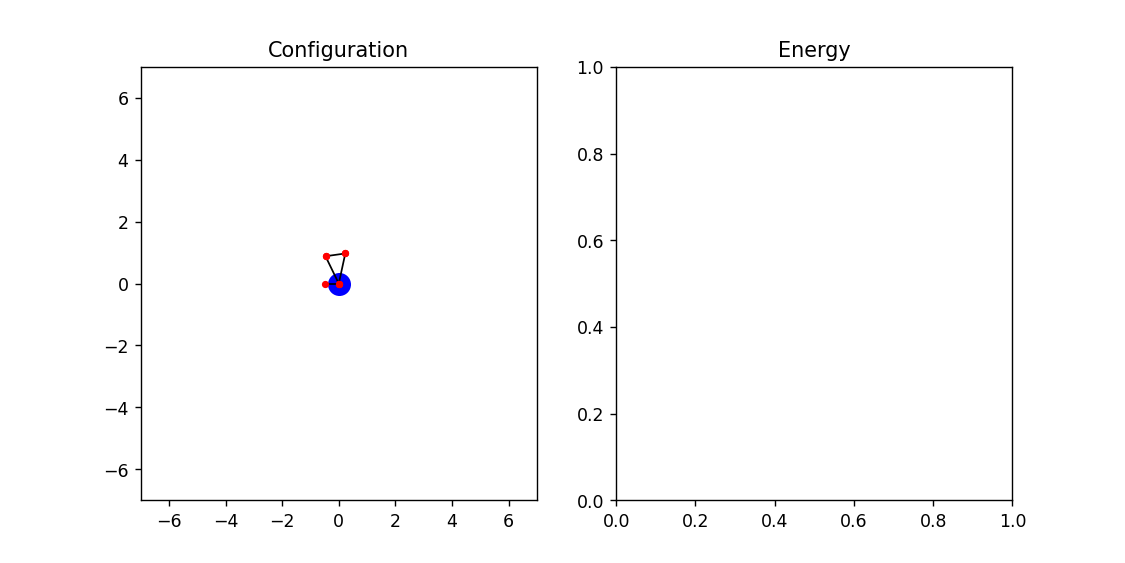

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [4]:
linkage = gs.Linkage()

In [5]:
#linkage.show_controllers(wait=True)

In [6]:
#linkage.solve = False

In [7]:
A = linkage.add_anchorpoint(at=[0,0,0])

In [8]:
a = A.add_frompointline(L=1, theta=0)

In [9]:
b = A.add_frompointline(L=1, theta=90)

In [10]:
c = A.add_frompointline(L=0.5, theta=180)

In [11]:
d = linkage.add_frompointsline(parent1=a.p2, parent2=b.p2)

In [12]:
d.constrain_length(1)

In [13]:
linkage.get_param_dict()

{'line.a.theta': Parameter(Parameter containing:
 tensor([0.0741], requires_grad=True), range=[0, 6.283185307179586], units=rad, locked=False),
 'line.b.theta': Parameter(Parameter containing:
 tensor([1.4967], requires_grad=True), range=[0, 6.283185307179586], units=rad, locked=False),
 'line.c.theta': Parameter(Parameter containing:
 tensor([3.1416], requires_grad=True), range=[0, 6.283185307179586], units=rad, locked=False)}

In [14]:
linkage.energy()

tensor(0.0934, grad_fn=<AddBackward0>)

In [15]:
linkage._energy()

tensor(0.1716, grad_fn=<AddBackward0>)

In [16]:
linkage.get_full_energy()

tensor([[1.0000, 0.0998, 0.0816, 0.5359, 0.9402, 0.9402, 0.5359, 0.0816, 0.0998,
         1.0000],
        [0.0998, 1.0000, 0.0998, 0.0816, 0.5359, 0.9402, 0.9402, 0.5359, 0.0816,
         0.0998],
        [0.0816, 0.0998, 1.0000, 0.0998, 0.0816, 0.5359, 0.9402, 0.9402, 0.5359,
         0.0816],
        [0.5359, 0.0816, 0.0998, 1.0000, 0.0998, 0.0816, 0.5359, 0.9402, 0.9402,
         0.5359],
        [0.9402, 0.5359, 0.0816, 0.0998, 1.0000, 0.0998, 0.0816, 0.5359, 0.9402,
         0.9402],
        [0.9402, 0.9402, 0.5359, 0.0816, 0.0998, 1.0000, 0.0998, 0.0816, 0.5359,
         0.9402],
        [0.5359, 0.9402, 0.9402, 0.5359, 0.0816, 0.0998, 1.0000, 0.0998, 0.0816,
         0.5359],
        [0.0816, 0.5359, 0.9402, 0.9402, 0.5359, 0.0816, 0.0998, 1.0000, 0.0998,
         0.0816],
        [0.0998, 0.0816, 0.5359, 0.9402, 0.9402, 0.5359, 0.0816, 0.0998, 1.0000,
         0.0998],
        [1.0000, 0.0998, 0.0816, 0.5359, 0.9402, 0.9402, 0.5359, 0.0816, 0.0998,
         1.0000]], grad_fn=<

In [17]:
linkage.get_full_energy().shape

torch.Size([10, 10])

In [18]:
x

NameError: name 'x' is not defined

In [ ]:
linkage.use_manual_params = True

In [ ]:
linkage.energy()

In [ ]:
linkage._energy()

In [ ]:
x

In [ ]:
linkage.get_full_energy()

In [ ]:
a.lock('beta')

In [ ]:
b.lock('beta')

In [ ]:
c = linkage.add_frompointsline(a.p2, b.p2)

In [ ]:
with linkage.solve_off():
    c.constrain_length(0)

In [ ]:
linkage.get_param_dict().keys()

In [ ]:
with linkage.solve_off():
    with linkage.manual_on():
        a.set_parameter('theta', np.linspace(0, 2*np.pi, 98).tolist())
        #a.set_parameter('beta', np.linspace(0, 1, 98).tolist())
        b.set_parameter('theta', np.linspace(0, 2*np.pi, 98).tolist())
        #b.set_parameter('beta', np.linspace(0, 1, 98).tolist())

In [ ]:
linkage.energy().shape

In [ ]:
with linkage.explicit_on():
    print(linkage._energy().shape)

In [ ]:
linkage._energy().shape

In [ ]:
E = linkage.get_full_energy()

In [ ]:
E.shape

In [ ]:
(E==E.min()).to(torch.long).nonzero()